# ThyroRisk Predictor: Advanced Analytics for Thyroid Cancer Risk Assessment

#### Author: Soheil Dejnabadi
#### Dataset Source: Thyroid Cancer Risk Dataset (https://www.kaggle.com/datasets/mzohaibzeeshan/thyroid-cancer-risk-dataset/data)

## Introduction
The Thyroid Cancer Risk Dataset Analysis project aims to explore and understand the complex relationships between various factors and thyroid cancer risk. This comprehensive study utilizes a dataset of 212,691 patient records, encompassing demographic information, clinical history, lifestyle factors, and key thyroid hormone levels. By applying advanced data analysis techniques, including exploratory data analysis, machine learning, and deep learning models, this project seeks to uncover patterns and predictors that may contribute to thyroid cancer risk assessment.

The primary objectives of this analysis are to:
1. Identify key risk factors associated with thyroid cancer
2. Develop accurate predictive models for thyroid cancer risk
3. Explore the relationships between lifestyle factors and thyroid cancer occurrence
4. Create a practical risk assessment tool for healthcare professionals

By achieving these goals, this project aims to contribute valuable insights to the field of thyroid cancer research and potentially improve early detection and prevention strategies.

## Data Loading and Initial Exploration

#### Implementation

Let's start by importing the necessary libraries and loading the dataset:

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import xgboost as xgb
from sklearn.impute import SimpleImputer

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')


# Load the dataset
df = pd.read_csv('thyroid_cancer_risk_data.csv')

# Display the first few rows and basic information about the dataset
print(df.head())
print(df.info())


   Patient_ID  Age  Gender  Country  Ethnicity Family_History  \
0           1   66    Male   Russia  Caucasian             No   
1           2   29    Male  Germany   Hispanic             No   
2           3   86    Male  Nigeria  Caucasian             No   
3           4   75  Female    India      Asian             No   
4           5   35  Female  Germany    African            Yes   

  Radiation_Exposure Iodine_Deficiency Smoking Obesity Diabetes  TSH_Level  \
0                Yes                No      No      No       No       9.37   
1                Yes                No      No      No       No       1.83   
2                 No                No      No      No       No       6.26   
3                 No                No      No      No       No       4.10   
4                Yes                No      No      No       No       9.10   

   T3_Level  T4_Level  Nodule_Size Thyroid_Cancer_Risk Diagnosis  
0      1.67      6.16         1.08                 Low    Benign  
1     

In [8]:
# Descriptive statistics
print(df.describe())

         Patient_ID            Age      TSH_Level       T3_Level  \
count  212691.00000  212691.000000  212691.000000  212691.000000   
mean   106346.00000      51.918497       5.045102       2.001727   
std     61398.74739      21.632815       2.860264       0.866248   
min         1.00000      15.000000       0.100000       0.500000   
25%     53173.50000      33.000000       2.570000       1.250000   
50%    106346.00000      52.000000       5.040000       2.000000   
75%    159518.50000      71.000000       7.520000       2.750000   
max    212691.00000      89.000000      10.000000       3.500000   

            T4_Level    Nodule_Size  
count  212691.000000  212691.000000  
mean        8.246204       2.503403  
std         2.164188       1.444631  
min         4.500000       0.000000  
25%         6.370000       1.250000  
50%         8.240000       2.510000  
75%        10.120000       3.760000  
max        12.000000       5.000000  


This code loads the dataset and provides an initial overview of its structure and content.

## Exploratory Data Analysis (EDA) & Visualization

Let's perform some exploratory data analysis to gain insights into the dataset:

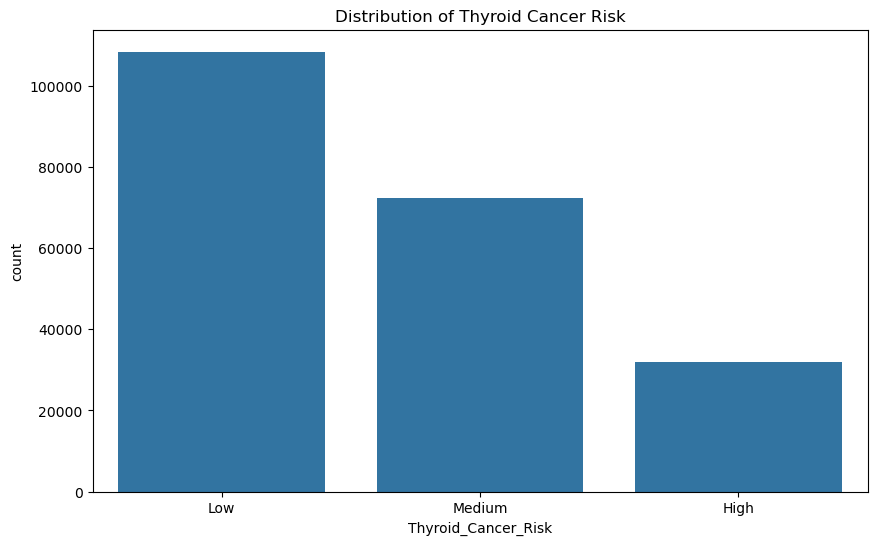

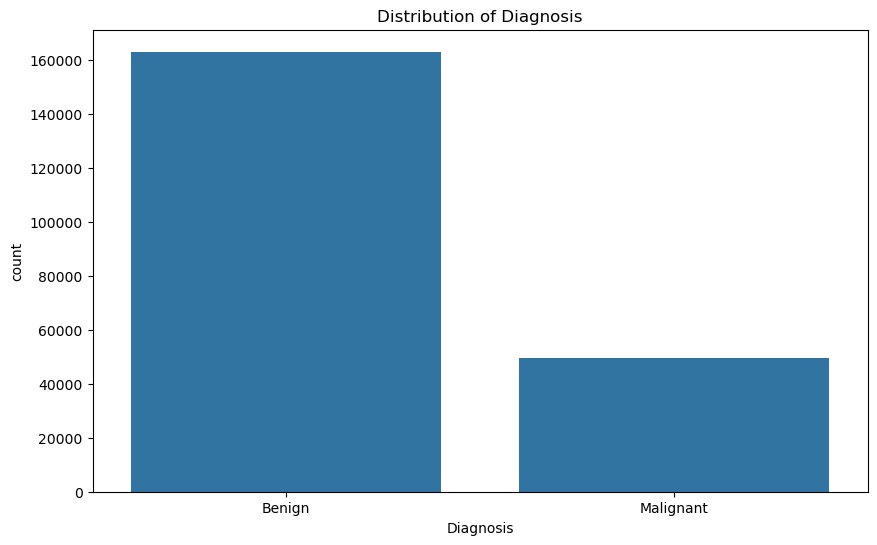

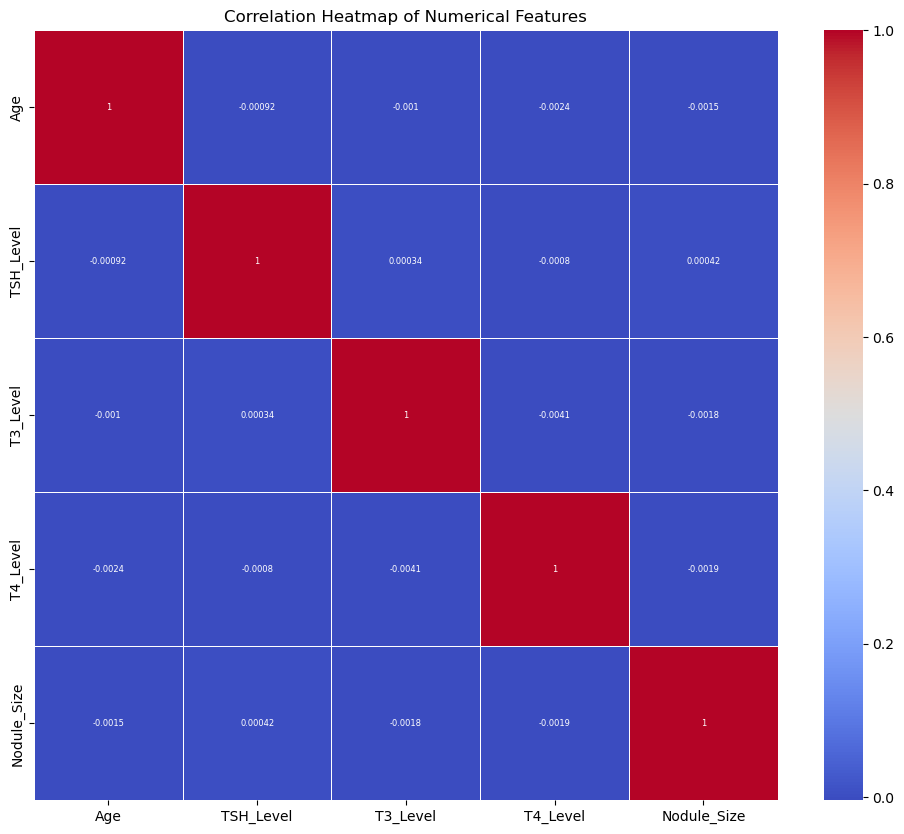

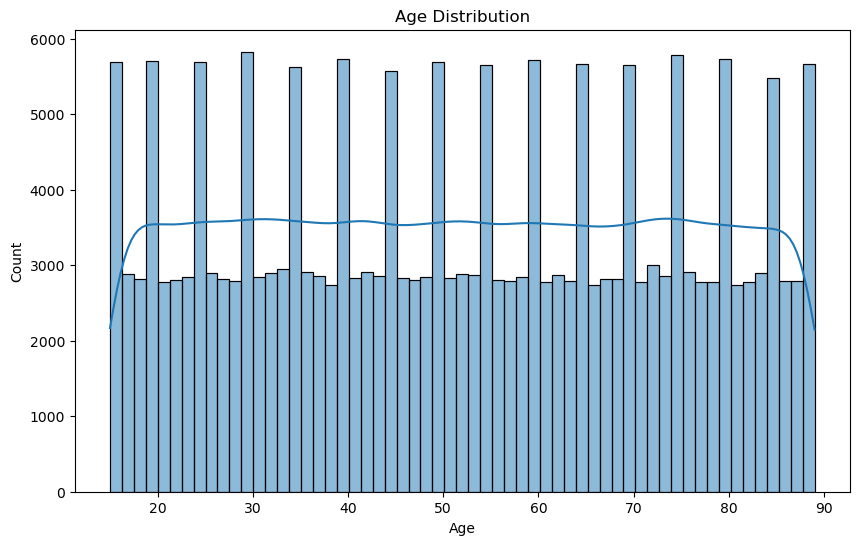

In [12]:
# Distribution of Thyroid Cancer Risk
plt.figure(figsize=(10, 6))
sns.countplot(x='Thyroid_Cancer_Risk', data=df)
plt.title('Distribution of Thyroid Cancer Risk')
plt.show()

# Distribution of diagnosis
plt.figure(figsize=(10, 6))
sns.countplot(x='Diagnosis', data=df)
plt.title('Distribution of Diagnosis')
plt.show()

# Correlation heatmap for numerical features 
numerical_features = ['Age', 'TSH_Level', 'T3_Level', 'T4_Level', 'Nodule_Size']

plt.figure(figsize=(12, 10))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm', linewidths=0.4, annot_kws={"size":6})
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.show()


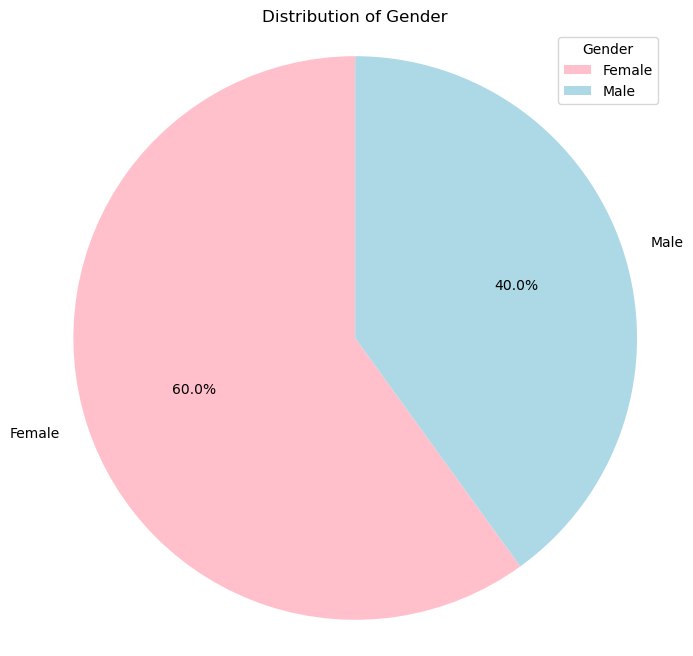

In [13]:
# Gender distribution
gender_counts = df['Gender'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['pink','lightblue'])
plt.title('Distribution of Gender')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.legend(title="Gender")
plt.show()

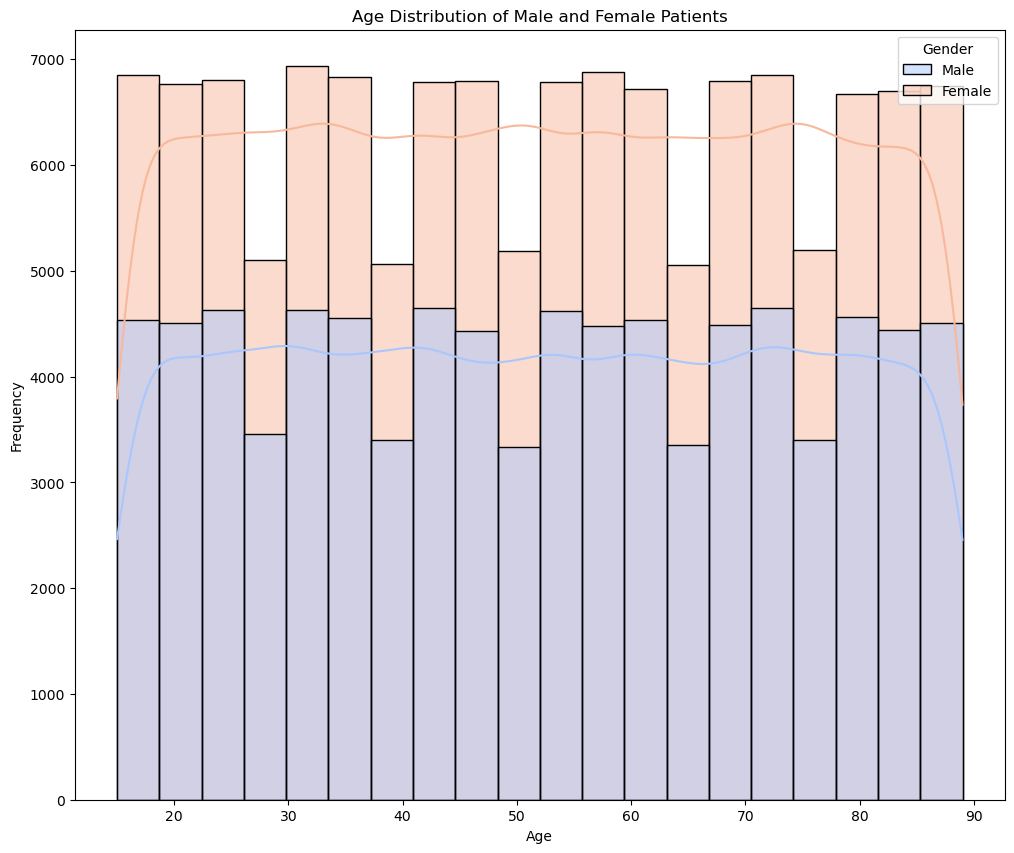

In [14]:
# Age distribution based on Gender 
plt.figure(figsize=(12, 10))
sns.histplot(df, x="Age", hue="Gender", bins=20, kde=True, palette="coolwarm")
plt.title("Age Distribution of Male and Female Patients")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

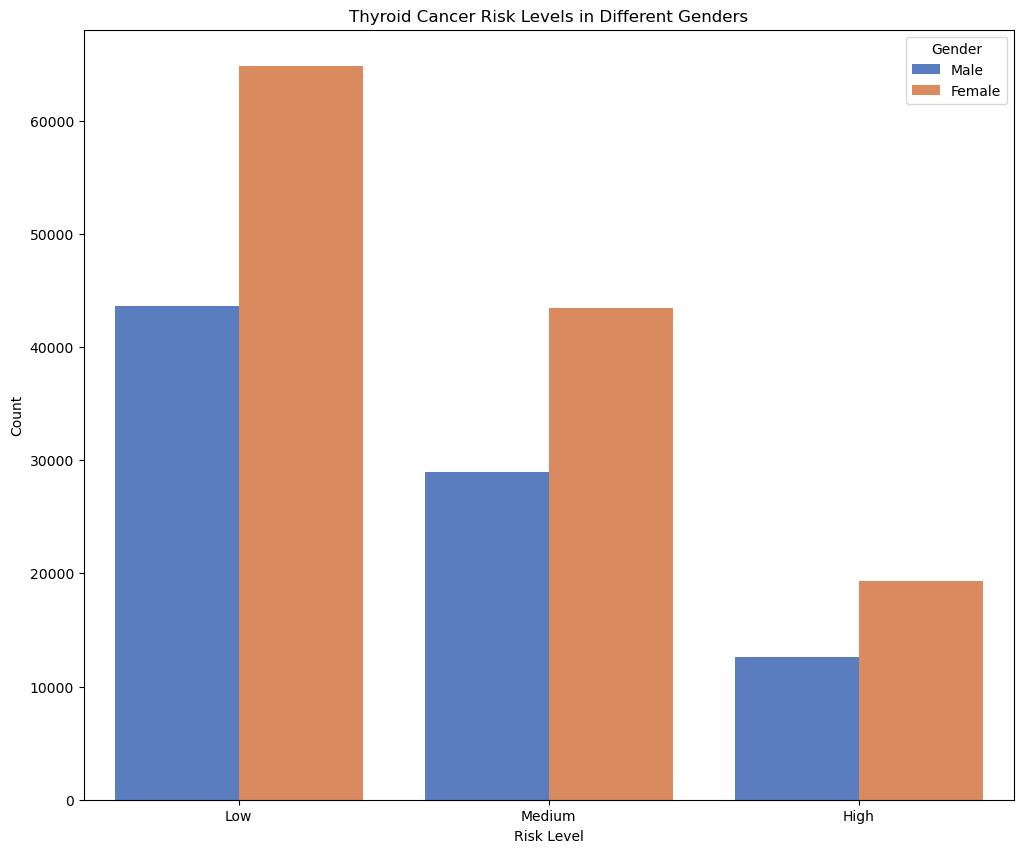

In [15]:
# Thyroid Cancer Risk Level based on Gender
plt.figure(figsize=(12, 10))
sns.countplot(data=df, x="Thyroid_Cancer_Risk", hue="Gender", palette="muted")
plt.title("Thyroid Cancer Risk Levels in Different Genders")
plt.xlabel("Risk Level")
plt.ylabel("Count")
plt.show()

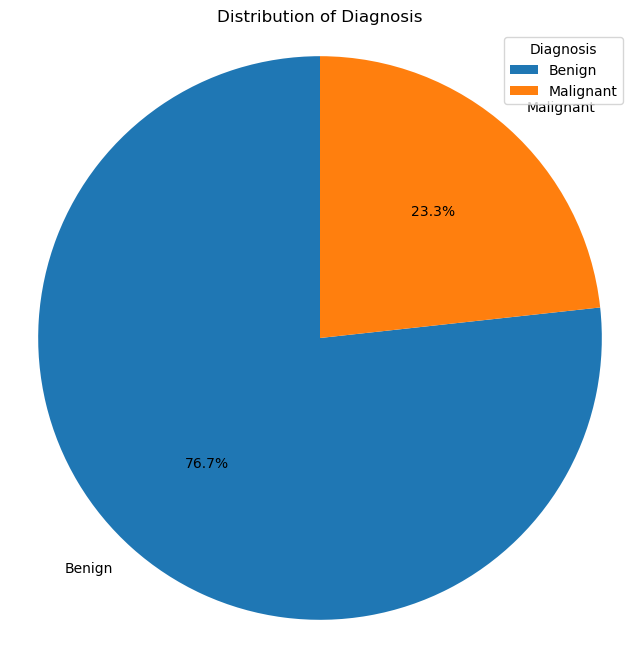

In [16]:
# Diagnosis distribution
diagnosis_counts = df['Diagnosis'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(diagnosis_counts.values, labels=diagnosis_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Diagnosis')
plt.axis('equal')  
plt.legend(title="Diagnosis")
plt.show()

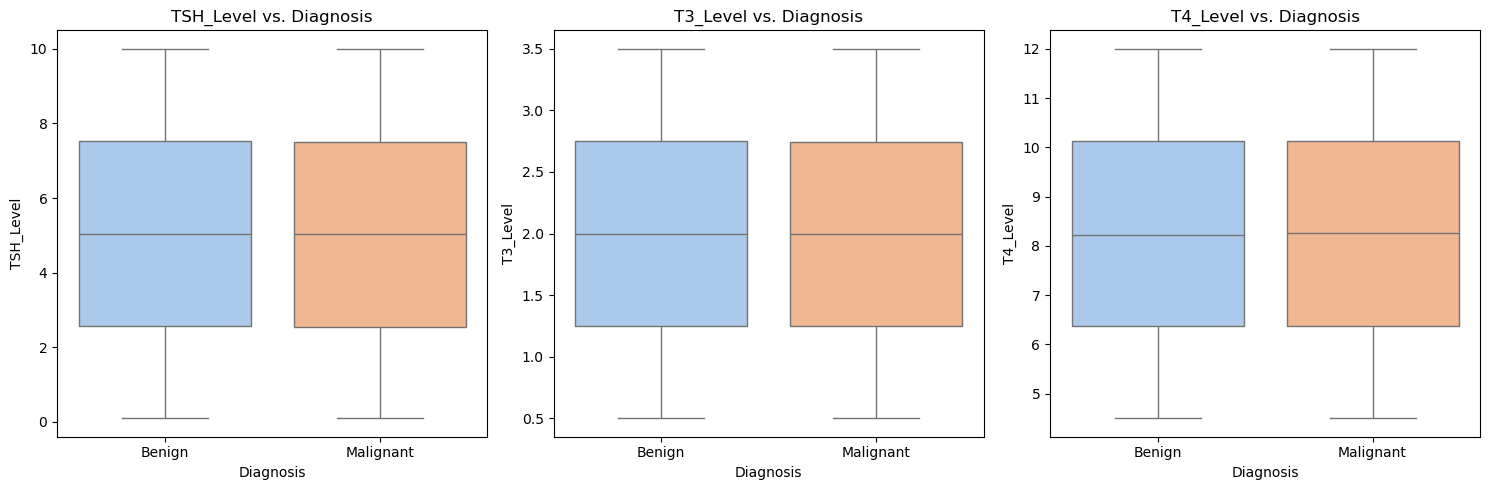

In [17]:
# Box plots for TSH, T3, and T4 levels vs. Diagnosis
hormone_levels = ['TSH_Level', 'T3_Level', 'T4_Level']
plt.figure(figsize=(15, 5))
for i, hormone in enumerate(hormone_levels):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(data=df, x='Diagnosis', y=hormone, palette="pastel")
    plt.title(f'{hormone} vs. Diagnosis')
plt.tight_layout()
plt.show()

These visualizations help understand the distribution of key variables and their relationships.

## Data Preprocessing

Now, let's preprocess the data by handling missing values, encoding categorical variables, and scaling numerical features:

In [21]:
# Handle missing values
imputer = SimpleImputer(strategy='most_frequent')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Encode categorical variables
mapping_dict = {
    "Family_History": {"Yes": 1, "No": 0},
    "Radiation_Exposure": {"Yes": 1, "No": 0},
    "Iodine_Deficiency": {"Yes": 1, "No": 0},
    "Smoking": {"Yes": 1, "No": 0},
    "Obesity": {"Yes": 1, "No": 0},
    "Diabetes": {"Yes": 1, "No": 0},
    "Thyroid_Cancer_Risk": {"Low": 0, "Medium": 1, "High": 2},
    "Diagnosis": {"Benign": 0, "Malignant": 1}
}

for column, mapping in mapping_dict.items():
    if column in df.columns:
        df[column] = df[column].map(mapping)

# Scale numerical features
scaler = StandardScaler()
numerical_cols = ['Age', 'TSH_Level', 'T3_Level', 'T4_Level', 'Nodule_Size']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Drop irrelevant columns
df = df.drop(columns=["Patient_ID", "Country", "Ethnicity", "Gender"], errors='ignore')

print(df.head())


        Age  Family_History  Radiation_Exposure  Iodine_Deficiency  Smoking  \
0  0.650934               0                   1                  0        0   
1 -1.059435               0                   1                  0        0   
2  1.575458               0                   0                  0        0   
3  1.066970               0                   0                  0        0   
4 -0.782077               1                   1                  0        0   

   Obesity  Diabetes  TSH_Level  T3_Level  T4_Level  Nodule_Size  \
0        0         0   1.512066 -0.382947 -0.963968    -0.985308   
1        0         0  -1.124060 -0.313683  1.059890     1.070585   
2        0         0   0.424751  0.679107  1.073752     1.458229   
3        0         0  -0.330426  0.713739  1.290924    -0.030045   
4        0         0   1.417669  0.124991  1.138441    -0.272322   

   Thyroid_Cancer_Risk  Diagnosis  
0                    0          0  
1                    0          0  
2       

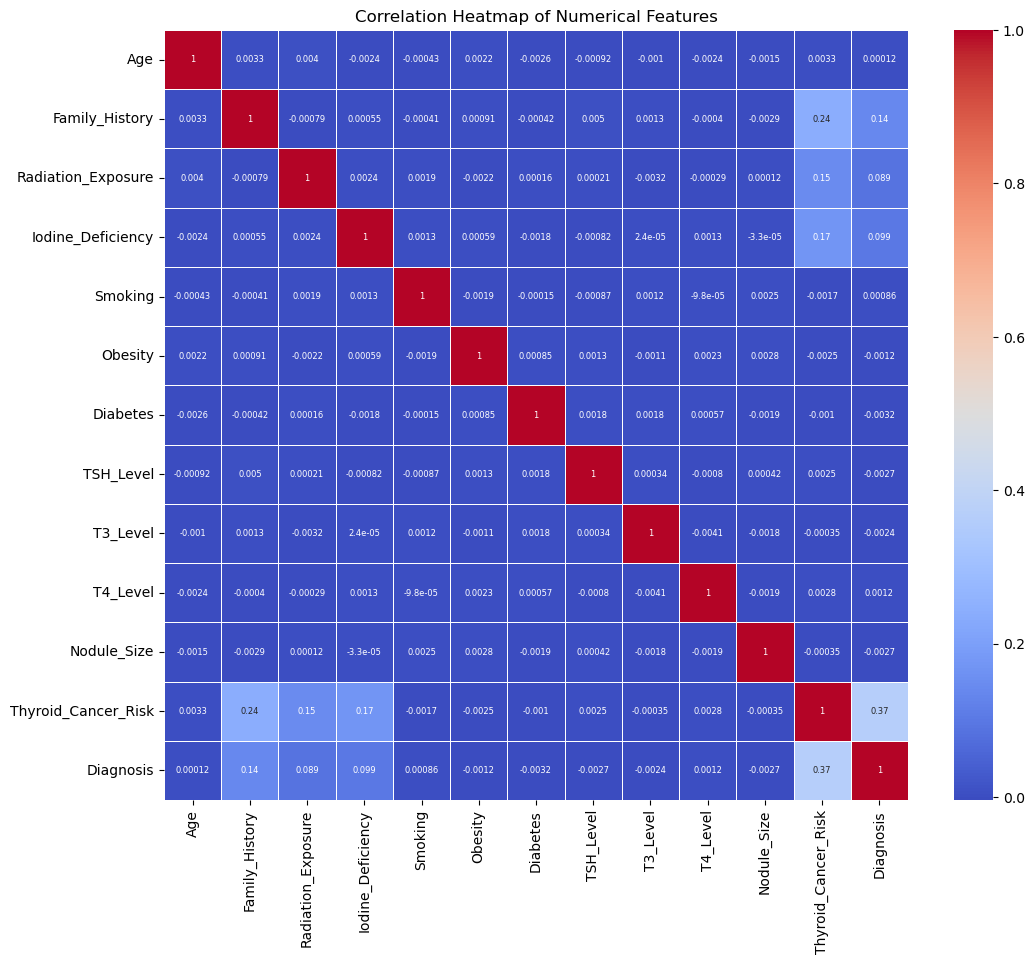

In [22]:
# Correlation heatmap for numerical features after encoding categorical variables
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.4, annot_kws={"size":6})
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

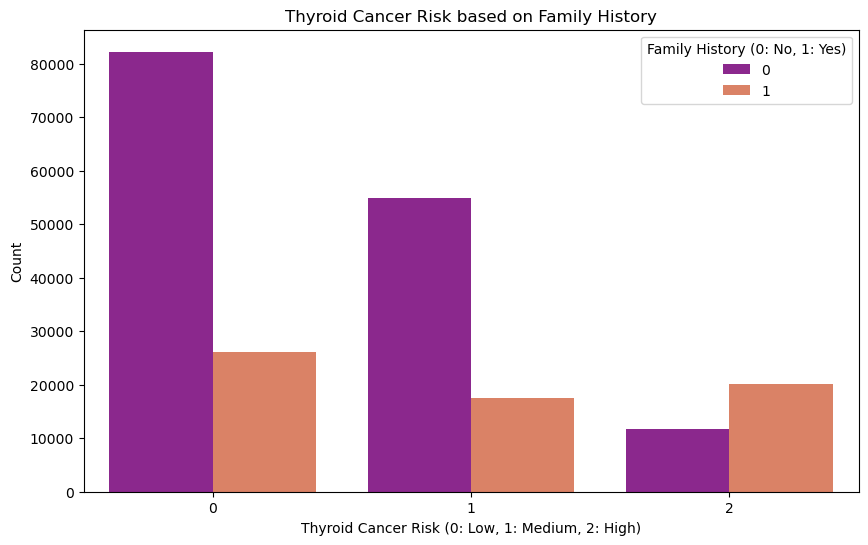

In [23]:
# Create a count plot for Thyroid Cancer Risk based on Family History
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Thyroid_Cancer_Risk', hue='Family_History', palette='plasma')
plt.title('Thyroid Cancer Risk based on Family History')
plt.xlabel('Thyroid Cancer Risk (0: Low, 1: Medium, 2: High)')
plt.ylabel('Count')
plt.legend(title='Family History (0: No, 1: Yes)')
plt.show()

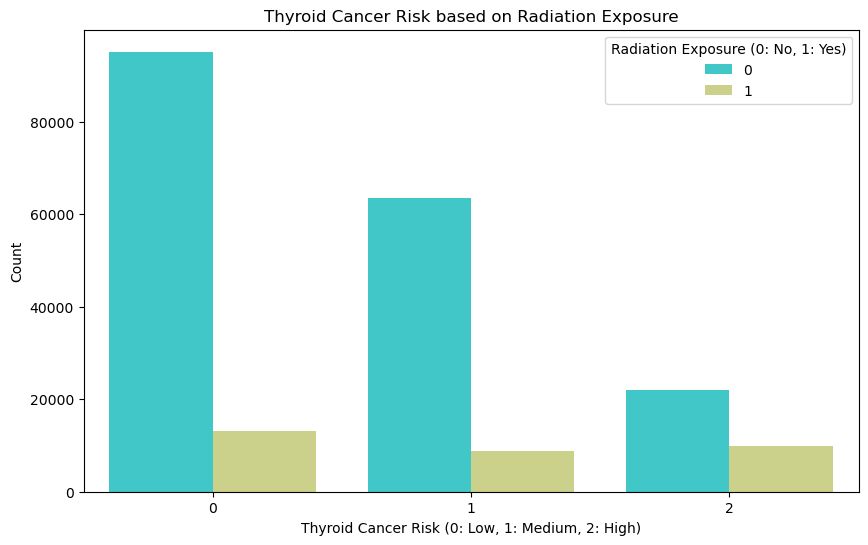

In [24]:
# Create a count plot for Thyroid Cancer Risk based on Radiation Exposure
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Thyroid_Cancer_Risk', hue='Radiation_Exposure', palette='rainbow')
plt.title('Thyroid Cancer Risk based on Radiation Exposure')
plt.xlabel('Thyroid Cancer Risk (0: Low, 1: Medium, 2: High)')
plt.ylabel('Count')
plt.legend(title='Radiation Exposure (0: No, 1: Yes)')
plt.show()

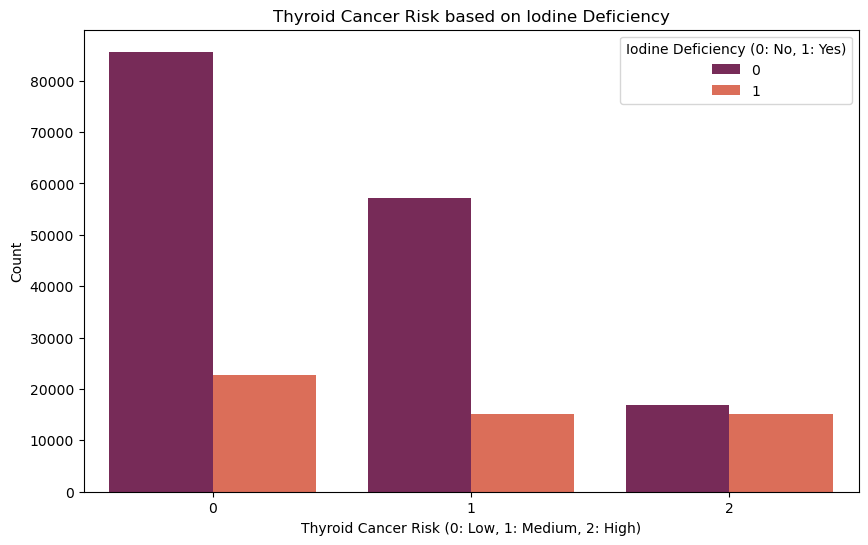

In [25]:
# Create a count plot for Thyroid Cancer Risk based on Iodine Deficiency
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Thyroid_Cancer_Risk', hue='Iodine_Deficiency', palette='rocket')
plt.title('Thyroid Cancer Risk based on Iodine Deficiency')
plt.xlabel('Thyroid Cancer Risk (0: Low, 1: Medium, 2: High)')
plt.ylabel('Count')
plt.legend(title='Iodine Deficiency (0: No, 1: Yes)')
plt.show()

In [26]:
# Separate features and target
X = df.drop(['Diagnosis'], axis=1)
y = df['Diagnosis']

In [27]:
# Split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Standardize features
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

This preprocessing pipeline handles both numerical and categorical features, including scaling and encoding.

## Machine Learning: Train Models for Risk Prediction

In [31]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "LightGBM": LGBMClassifier(random_state=42)
}

results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results.append((name, accuracy))
    print(f"\n{name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))


Logistic Regression Results:
Accuracy: 0.8251
              precision    recall  f1-score   support

           0       0.85      0.94      0.89     32615
           1       0.69      0.45      0.54      9924

    accuracy                           0.83     42539
   macro avg       0.77      0.69      0.72     42539
weighted avg       0.81      0.83      0.81     42539


Random Forest Results:
Accuracy: 0.8233
              precision    recall  f1-score   support

           0       0.85      0.94      0.89     32615
           1       0.69      0.44      0.53      9924

    accuracy                           0.82     42539
   macro avg       0.77      0.69      0.71     42539
weighted avg       0.81      0.82      0.81     42539


Gradient Boosting Results:
Accuracy: 0.8250
              precision    recall  f1-score   support

           0       0.85      0.94      0.89     32615
           1       0.69      0.45      0.54      9924

    accuracy                           0.83     4

This code defines the models, splits the preprocessed data into training and test sets, then trains and evaluates each model. The results include accuracy and a classification report for each model.

#### Make a data frame from the results of the Models

In [34]:
res_df = pd.DataFrame(results, columns=["Model", "Accuracy"])

In [35]:
# Sort results by accuracy
res_df = res_df.sort_values(by=["Accuracy"], ascending=[True])

In [36]:
# Display the sorted results
res_df

,Model,Accuracy
4,Decision Tree,0.703872
5,Naive Bayes,0.812031
1,Random Forest,0.823339
6,XGBoost,0.824114
2,Gradient Boosting,0.825008
0,Logistic Regression,0.825055
3,AdaBoost,0.825055
7,LightGBM,0.825055


#### Graph of Models performance

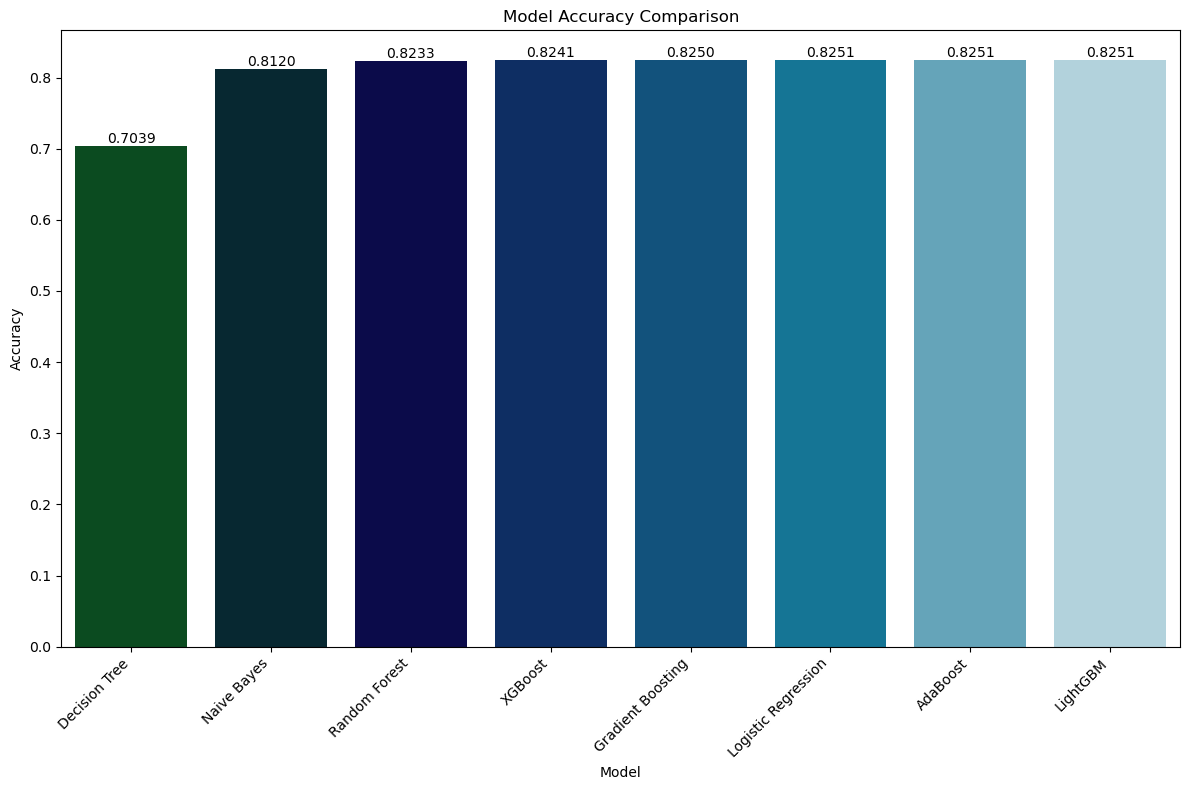

In [38]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=res_df, x="Model", y="Accuracy", palette="ocean")
plt.title("Model Accuracy Comparison")
plt.xlabel("Model")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Accuracy")

# Add accuracy values on top of each bar
for i, v in enumerate(res_df['Accuracy']):
    ax.text(i, v, f'{v:.4f}', ha='center', va='bottom')

# Adjust layout to prevent cutting off labels
plt.tight_layout()
    
plt.show()

## Statistical Testing: Check Correlations Between Lifestyle Factors and Thyroid Cancer

In [40]:
from scipy.stats import chi2_contingency

In [41]:
lifestyle_factors = ['Smoking', 'Obesity', 'Diabetes']

for factor in lifestyle_factors:
    contingency_table = pd.crosstab(df[factor], df['Diagnosis'])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-square test for {factor}:")
    print(f"p-value: {p_value}")
    print("Significant" if p_value < 0.05 else "Not significant")
    print()

Chi-square test for Smoking:
p-value: 0.6958313253476616
Not significant

Chi-square test for Obesity:
p-value: 0.5732949946709196
Not significant

Chi-square test for Diabetes:
p-value: 0.13945772780815632
Not significant



This code performs statistical tests to check for significant associations between lifestyle factors and thyroid cancer diagnosis.

## Conclusion

While this project has made significant strides in understanding thyroid cancer risk, it also highlights the need for continued research in this field. Future studies may benefit from incorporating additional data sources, exploring emerging risk factors, and refining predictive models to further improve accuracy and clinical utility.

In conclusion, this project represents a significant contribution to the field of thyroid cancer research, offering both practical tools for risk assessment and valuable directions for future investigations.